# Energy Consumption Prediction using Timeseries data

This is an experimental data used to create regression models of appliances energy use in a low energy building.

More information about the dataset can be availed from below link:

https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

**Resources**:
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [37]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
import statsmodels.api as sm

In [50]:
# Load data
data_path = 'energydata_complete.csv'

data = pd.read_csv(data_path)
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [52]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

In [53]:
data['hourOfDay'] = data['date'].dt.hour

In [54]:
data['dayOfWeek'] = data['date'].dt.day_name()

In [55]:
data['dayOfMonth'] = data['date'].dt.day

In [56]:
data['DateTime_hourly'] = data['date'].dt.strftime('%Y-%m-%d %H')

In [57]:
data['date'] = data['date'].dt.date

In [58]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hourOfDay,dayOfWeek,dayOfMonth,DateTime_hourly
0,2016-01-11,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,Monday,11,2016-01-11 17
1,2016-01-11,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,Monday,11,2016-01-11 17
2,2016-01-11,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,Monday,11,2016-01-11 17
3,2016-01-11,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,Monday,11,2016-01-11 17
4,2016-01-11,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,Monday,11,2016-01-11 17


In [60]:
hourly_data = data.groupby('DateTime_hourly', as_index=False).mean().sort_values('DateTime_hourly')
hourly_data = hourly_data.set_index('DateTime_hourly')
hourly_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hourOfDay,dayOfMonth
DateTime_hourly,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,17.0,11.0
2016-01-11 18,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,18.0,11.0
2016-01-11 19,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,19.0,11.0
2016-01-11 20,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,20.0,11.0
2016-01-11 21,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,21.0,11.0


In [61]:
px.line(hourly_data, x=hourly_data.index, y='Appliances')

## Check for Stationarity in the time series

**Stationarity** means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time.

### Why is this important?

- stationary processes are easier to analyze
- stationary processes are easier to model and investigate.
- stationary processes should be possible to predict, as the way they change is predictable.
- stationarity has become a common assumption for many practices and tools in time series analysis including **trend estimation**, **forecasting** and **causal inference**, among others.

### How to make a time series stationary:

- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above

### Augmented Dickey-Fuller test

Its is a statistical unit root test that tests whether a time series is not stationary and consists of a unit root in time series analysis.

**The Hypothesis:**

- $H_{0}$: The time series is non-stationary
- $H_{A}$: The time series is stationary

In [62]:
# ADF Test at 0.05 significance level
result = adfuller(hourly_data['Appliances'], autolag='AIC')

#Extracting the values from the results:
print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

if result[1] < 0.05:
    print ("Reject Null Hypothesis - Time Series is Stationary")
else:
    print ("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Statistic: -8.948888
p-value: 0.000000
Reject Null Hypothesis - Time Series is Stationary


## Extract Seasonality and Trend components using time series decomposition

**Time series decomposition** is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise

- **Seasonality**: describes the periodic signal in your time series.
- **Trend**: describes whether the time series is decreasing, constant, or increasing over time.
- **Noise**: describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.

In [64]:
decomposition = sm.tsa.seasonal_decompose(hourly_data['Appliances'], model='additive', period=24)

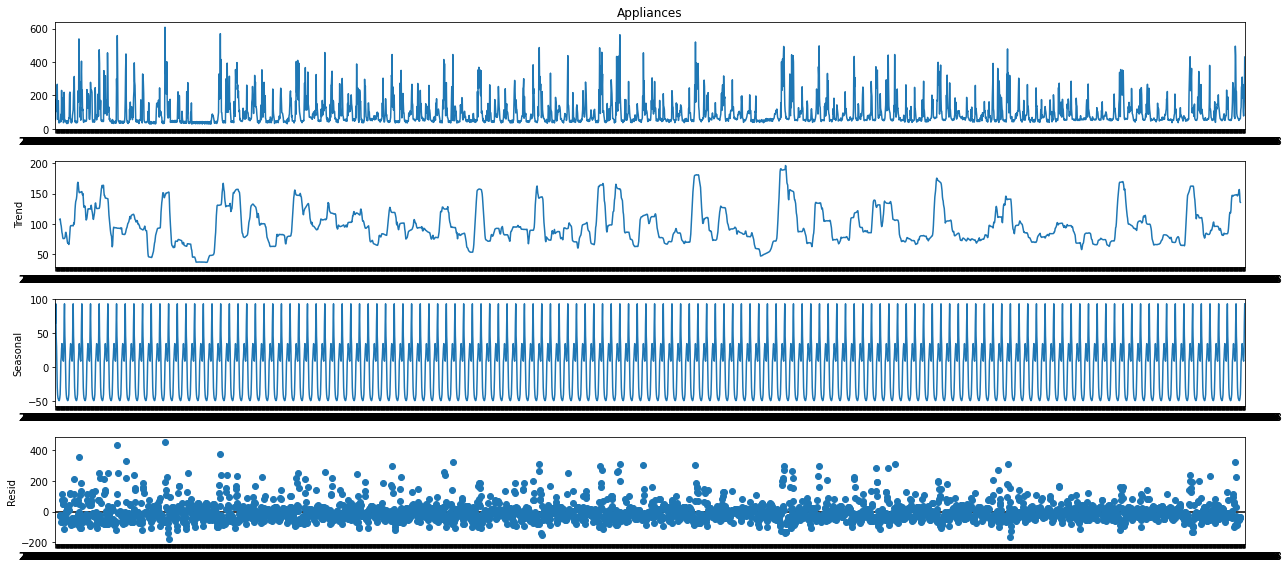

In [65]:
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot((18,8))
plt.show()

### Check whether the series is predictable

For a time series to be predictable **The correlation between time series and its lagged version should be significant**

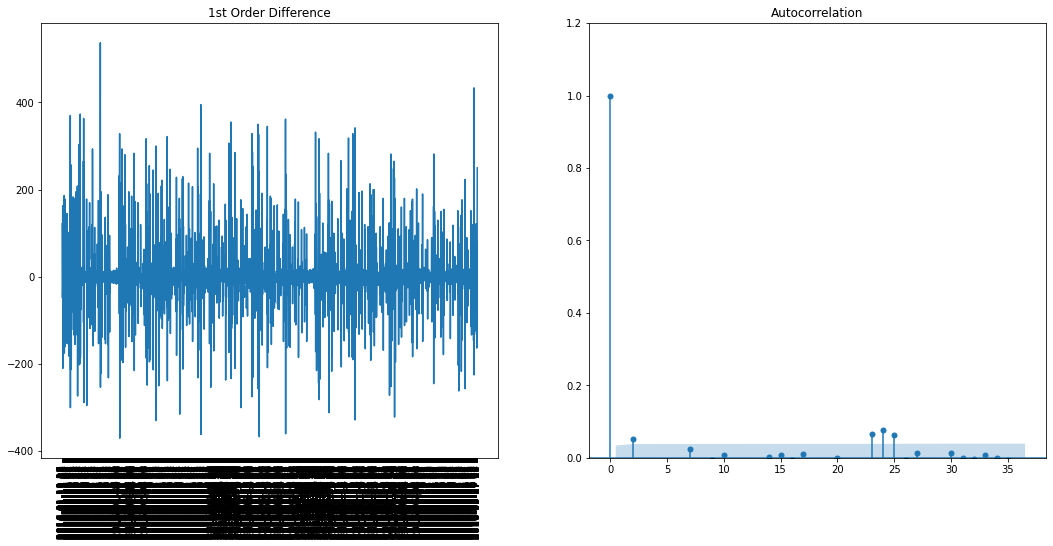

In [68]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(hourly_data['Appliances'].diff())
axes[0].set_title('1st Order Difference')
axes[0].tick_params(axis='x', rotation=90)
axes[1].set(ylim=(0,1.2))
plot_acf(hourly_data['Appliances'].diff().dropna(), ax=axes[1])

plt.show()

Its is clear from the abive plots that time series forecasting can not be performed using the appliances data

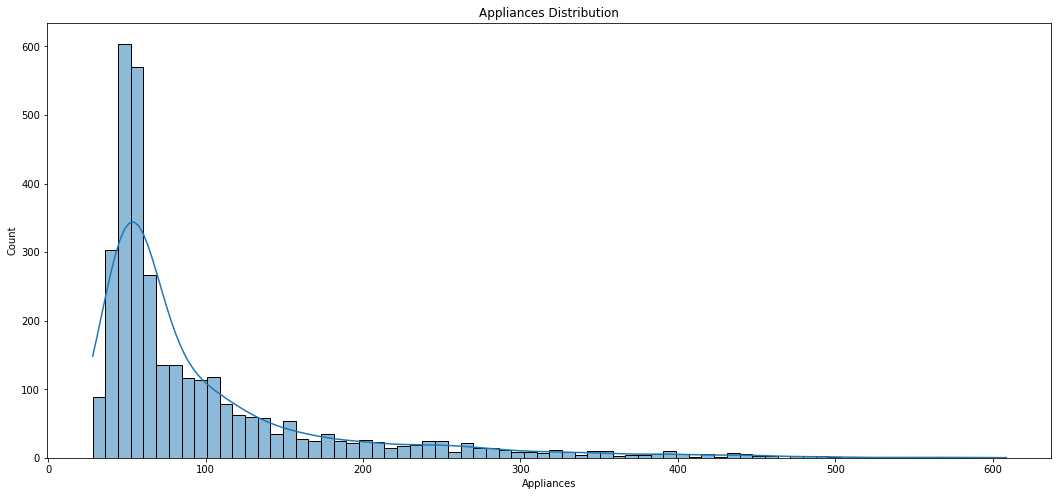

In [73]:
sns.histplot(data=hourly_data, x='Appliances', kde=True)
plt.title('Appliances Distribution')
plt.show()